In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn

In [2]:
(xtrain, ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


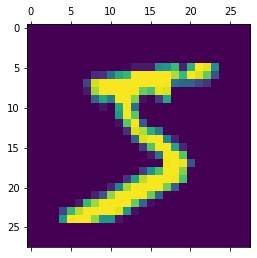

In [3]:
plt.matshow(xtrain[0])

In [4]:
xtrain.shape

(60000, 28, 28)

In [22]:
xtest.shape

(10000, 784)

In [6]:

xtest[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
#normalyzation
xtest = xtest / 255
xtrain = xtrain / 255

In [8]:
xtest[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
#flatten images into 28*28 to 784
xtrain = xtrain.reshape(-1,784)
xtest = xtest.reshape(-1, 784)

In [12]:
xtrain[0].shape

(784,)

In [13]:
model = keras.Sequential()
model.add(Dense(64, activation='relu', input_dim=784)) #input layer
model.add(Dense(64, activation='relu')) #hidden layer
model.add(Dense(10, activation='softmax')) #output layer

In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

In [15]:
model.fit(
    xtrain,
    to_categorical(ytrain),
    epochs = 10,
    batch_size = 32,
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4936 - accuracy: 0.8565
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1298 - accuracy: 0.9601
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0924 - accuracy: 0.9713
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0675 - accuracy: 0.9788
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0567 - accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0445 - accuracy: 0.9853
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0384 - accuracy: 0.9882
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0329 - accuracy: 0.9892
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0294 - accuracy: 0.9901
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.022

In [16]:
model.evaluate(xtest, to_categorical(ytest))

313/313 [==============================] - 0s 1ms/step - loss: 0.0990 - accuracy: 0.9750


[0.09895118325948715, 0.9750000238418579]

In [18]:
pred = model.predict(xtest)
pred

array([[3.0422736e-08, 1.1539759e-10, 1.4988011e-07, ..., 9.9999928e-01,
        1.8780253e-09, 6.9556428e-08],
       [2.3508025e-12, 8.0982467e-08, 9.9999976e-01, ..., 1.1231640e-15,
        4.4006634e-09, 8.1792963e-19],
       [5.8128142e-09, 9.9967813e-01, 5.6431386e-06, ..., 2.4574951e-04,
        6.4357948e-05, 8.4036219e-07],
       ...,
       [4.3916131e-18, 3.6562715e-15, 1.8517202e-16, ..., 7.8299522e-08,
        3.2152097e-11, 5.6412627e-08],
       [3.8390402e-11, 1.0115869e-11, 1.4145401e-13, ..., 6.2127304e-12,
        3.8387116e-05, 1.3068705e-11],
       [1.0719078e-13, 4.5067690e-16, 8.0949743e-12, ..., 1.5290263e-19,
        1.3281112e-12, 3.0330728e-17]], dtype=float32)

In [19]:
pred = model.predict(xtest)
np.argmax(pred[0])

7

Text(69.0, 0.5, 'Truth Values')

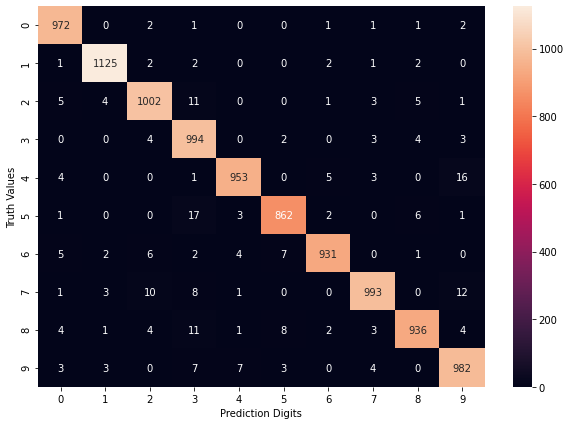

In [21]:
y_pred = model.predict(xtest)
ypred = [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=ytest, predictions=ypred)
plt.figure(figsize=(10,7))
seaborn.heatmap(con_matrix, annot=True, fmt='d')
plt.xlabel('Prediction Digits')
plt.ylabel('Truth Values')